In [75]:
import os
from ibm_watson import VisualRecognitionV3, ApiException
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator
from IPython.display import Image, display

In [40]:
apikey = os.environ.get("API_KEY")
apiurl = os.environ.get("API_URL")
version = '2018-03-19',

In [41]:
authenticator = IAMAuthenticator(apikey)
visual_recognition = VisualRecognitionV3(
    version=version,
    authenticator=authenticator
)

visual_recognition.set_service_url(apiurl)

In [48]:
def classify(service: VisualRecognitionV3, image_path: str) -> dict:
    try:
        with open(image_path, 'rb') as images_file:
            results = service.classify(
                images_file=images_file,
                threshold='0.1',
                classifier_ids=['default']).get_result()
            return results
    except ApiException as ex:
        print(ex)

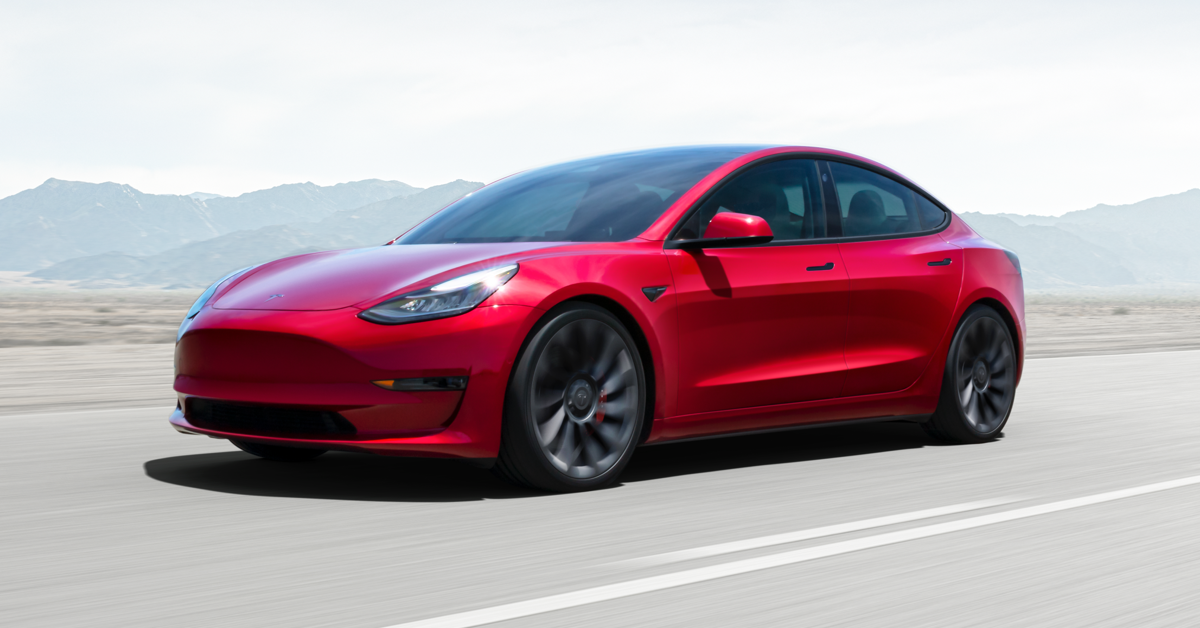

coupe car            0.607
car                  0.758
wheeled vehicle      0.845
vehicle              0.846
body (of vehicle)    0.558
motor vehicle        0.544
sports car           0.506
seat                   0.5
furniture              0.5
maroon color         0.914
claret red color     0.777


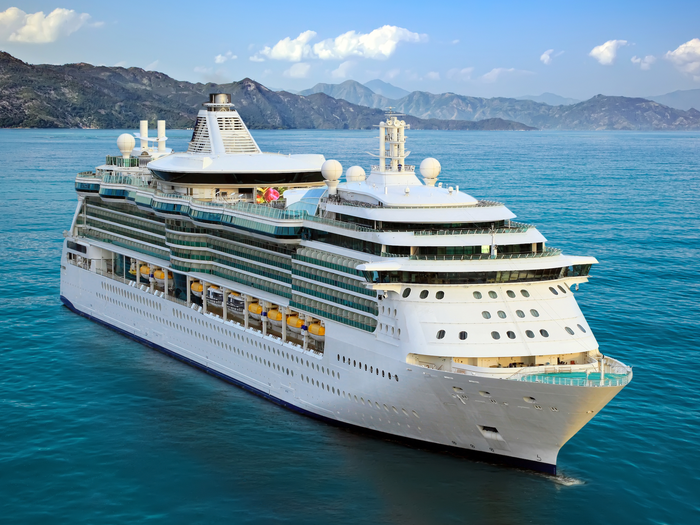

passenger ship        0.91
ship                 0.914
watercraft           0.915
craft                0.916
vehicle              0.916
hurricane deck         0.5
platform               0.5
sea green color      0.761
blue color           0.665


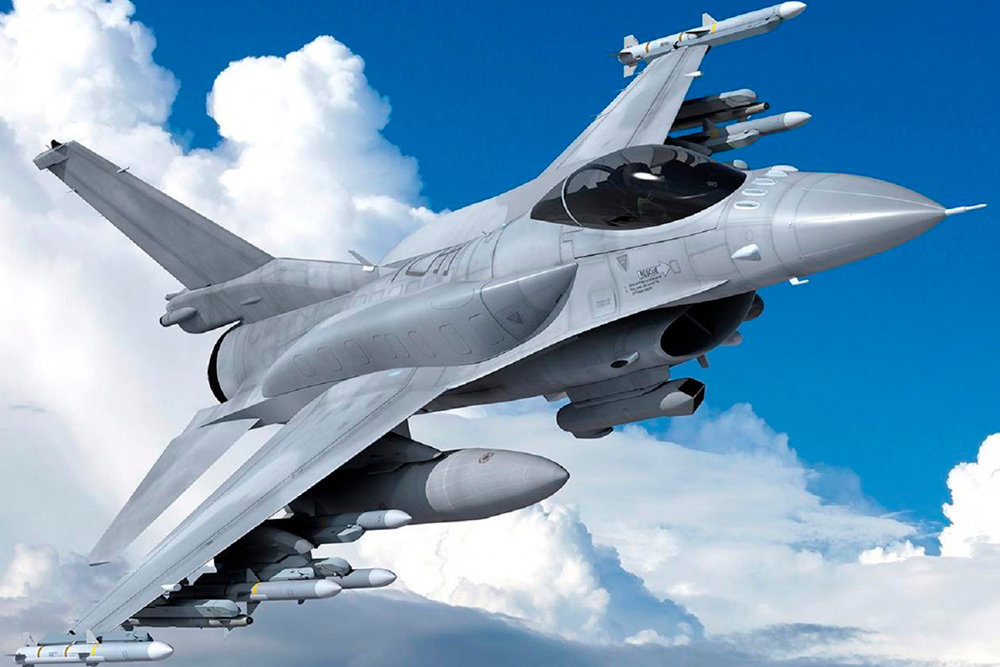

interceptor plane    0.779
warplane             0.892
military vehicle     0.892
vehicle              0.922
fighter aircraft     0.662
air-to-air missile     0.5
missile              0.507
rocket               0.514
weaponry             0.783
system               0.796
aircraft             0.793
blue color           0.968


In [82]:
image_path = './data'
for filename in os.listdir(image_path):
    filename = os.path.join(image_path, filename)
    display(Image(filename=filename, width = 600, height = 300))

    result = classify(visual_recognition, filename)

    for img in result['images']:
        for clf in img['classifiers']:
            for c in clf["classes"]:
                print(f"{c['class']:20} {c['score']:5}")